In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install pmdarima
!pip install keras tensorflow
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 3.1 MB/s eta 0:00:00


In [4]:
!pip install -q yfinance

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import itertools

from statsmodels.tsa.arima.model import ARIMA



# Download Tesla stock data from 2018-01-01 to 2022-12-31
start_date = '2018-01-01'
end_date = '2022-12-31'
ticker = 'TSLA'
data = yf.download(ticker, start=start_date, end=end_date)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Grid search for the best ARIMA parameters
p_range = range(0, 3)
d_range = range(0, 3)
q_range = range(0, 3)

pdq_combinations = list(itertools.product(p_range, d_range, q_range))

best_aic = float('inf')
best_pdq = None

for pdq in pdq_combinations:
    try:
        arima_model = ARIMA(train_data['Close'], order=pdq)
        arima_model_fit = arima_model.fit()
        current_aic = arima_model_fit.aic

        if current_aic < best_aic:
            best_aic = current_aic
            best_pdq = pdq

    except ValueError:
        continue

print(f"Best ARIMA parameters: {best_pdq}")

# Fit the ARIMA model with the best parameters
arima_model = ARIMA(train_data['Close'], order=best_pdq)
arima_model_fit = arima_model.fit()

# Make predictions using ARIMA
arima_preds = arima_model_fit.forecast(steps=len(test_data))[0]

# Calculate RMSE and MAE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_preds))
arima_mae = mean_absolute_error(test_data['Close'], arima_preds)
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ARIMA MAE: {arima_mae:.2f}")

# Plot the train data, test data, and ARIMA predictions
plt.figure(figsize=(14, 6))
plt.plot(data.index[:train_size], train_data['Close'], label='Train Data', color='blue')
plt.plot(data.index[train_size:], test_data['Close'], label='Test Data', color='green')
plt.plot(data.index[train_size:], arima_preds, label='ARIMA Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Closing Price with ARIMA Predictions')
plt.legend()
plt.show()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000


## Arima

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Fetch data
symbol = 'TSLA'
start_date = '2018-01-01'
end_date = '2018-12-31'
data = yf.download(symbol, start=start_date, end=end_date)

# Train-test split
train_size = int(len(data) * 0.95)
train_data = data[:train_size]
test_data = data[train_size:]

# ARIMA model
arima_model = auto_arima(train_data['Close'], suppress_warnings=True, seasonal=True, stepwise=True)
arima_preds = arima_model.predict(n_periods=len(test_data))

# Calculate RMSE and MAE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_preds))
arima_mae = mean_absolute_error(test_data['Close'], arima_preds)
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ARIMA MAE: {arima_mae:.2f}")


237    24.119572
238    23.911979
239    23.719385
240    23.540705
241    23.374936
242    23.221144
243    23.078463
244    22.946092
245    22.823284
246    22.709350
247    22.603647
248    22.505581
249    22.414601
dtype: float64

### Sarima

In [4]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_sample.y_log, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())



NameError: name 'df_sample' is not defined

In [6]:
  from statsmodels.tsa.statespace.sarimax import SARIMAX

  ##################################################
  # SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)
  ##################################################

  train_data = data[:'2022-10-02']
  len(train_data)  # 60 ay

  # 1998'in ilk ayından 2001'in sonuna kadar test set.
  test_data = data['2022-10-01':]
  len(test_data)  # 15 ay


  model = SARIMAX(train_data['Close'])#, order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
  sarima_model = model.fit()
  #print(sarima_model.summary())
    
  y_pred_test = sarima_model.get_forecast()
  y_pred = y_pred_test.predicted_mean
  y_pred = pd.Series(y_pred, index=test_data.index)

  def plot_tes(train_data, test_data, y_pred, title):
    mae = mean_absolute_error(test_data, y_pred)
    train_data.plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test_data.plot(legend=True, label="TEST", figsize=(14,7))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()


  plot_tes(train_data['Close'], test_data['Close'], y_pred, "SARIMA")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14289D+00    |proj g|=  1.45377D-03

At iterate    5    f=  1.14289D+00    |proj g|=  2.44795D-03

At iterate   10    f=  1.14282D+00    |proj g|=  1.06129D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     19      1     0     0   1.352D-07   1.143D+00
  F =   1.1428081339576570     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

ValueError: x and y must have same first dimension, but have shapes (237,) and (250,)

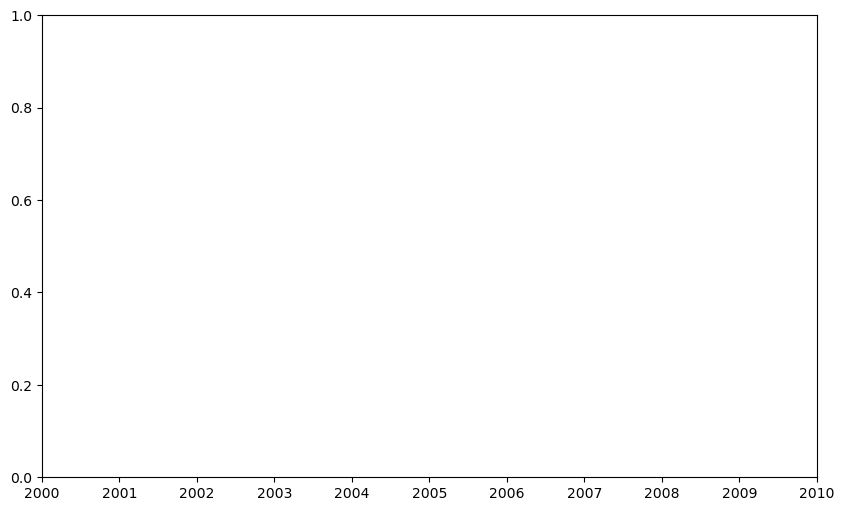

In [7]:
# Plot the train data, test data, and ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:train_size], train_data['Close'], label='Train Data', color='blue')
plt.plot(data.index[train_size:], test_data['Close'], label='Test Data', color='green')
plt.plot(data.index[train_size:], arima_preds, label='ARIMA Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Closing Price with ARIMA Predictions')
plt.legend()
plt.show()


In [ ]:
sequence_length

In [ ]:
data.index[train_size]

## LSTM

In [ ]:
train_size - sequence_length

In [ ]:
from keras.layers import Dropout

# Data preprocessing for LSTM
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length = 90
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

train_data_lstm = scaled_data[:train_size]
test_data_lstm = scaled_data[train_size - sequence_length:]

x_train, y_train = create_sequences(train_data_lstm, sequence_length)
x_test, y_test = create_sequences(test_data_lstm, sequence_length)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# LSTM model with more layers and dropout
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=0)

# Make predictions using LSTM
lstm_preds = lstm_model.predict(x_test)
lstm_preds = scaler.inverse_transform(lstm_preds)

# Calculate RMSE and MAE for LSTM
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))
lstm_mae = mean_absolute_error(y_test, lstm_preds)
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"LSTM MAE: {lstm_mae:.2f}")


In [ ]:
# Plot the train data, test data, and ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:train_size], train_data['Close'], label='Train Data', color='blue')
plt.plot(data.index[train_size:], test_data['Close'], label='Test Data', color='green')
plt.plot(data.index[train_size + sequence_length:], lstm_preds.flatten()[:len(test_data) - sequence_length], label='LSTM Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Closing Price with LSTM Predictions')
plt.legend()
plt.show()


## denemeler

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Stock,order=(1, 0, 0),seasonal_order=(0,0,0,12),enforce_stationarity=False,enforce_invertibility=False)
# Fit the model and print results
output = ARIMA_MODEL.fit()
print(output.summary().tables[1])